In [32]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('Crop_Yield_Prediction.csv')
df.head()

,Location,Soil_Type,Temperature,Rainfall,Humidity,Wind_Speed,Sunlight_Hours,Soil_Nutrient_Level,Fertilizer_Use,Crop_Yield
0,Alisonmouth,Peaty,31.786940,124.819642,57.989290,7.409815,12.623845,4,0,20.256173
1,Rogerhaven,Loam,23.465610,95.108967,40.197089,13.229554,9.454392,3,0,80.792481
2,Morrisonstad,Loam,33.210095,80.434182,59.855553,18.439714,5.066017,3,1,87.418881
3,Cohenborough,Sandy,22.124094,115.749685,45.353265,10.048269,13.674883,3,1,46.431999
4,New Christophertown,Peaty,18.259956,72.003987,79.273729,19.809637,13.298739,2,1,23.414083


In [34]:
dc=df.columns.tolist()
print(dc)

['Location', 'Soil_Type', 'Temperature', 'Rainfall', 'Humidity', 'Wind_Speed', 'Sunlight_Hours', 'Soil_Nutrient_Level', 'Fertilizer_Use', 'Crop_Yield']


In [35]:
df.drop(columns=['Location'], inplace=True)

In [36]:
dc=df.columns.tolist()
print(dc)

['Soil_Type', 'Temperature', 'Rainfall', 'Humidity', 'Wind_Speed', 'Sunlight_Hours', 'Soil_Nutrient_Level', 'Fertilizer_Use', 'Crop_Yield']


In [37]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [38]:
df.isnull().sum()


Soil_Type              0
Temperature            0
Rainfall               0
Humidity               0
Wind_Speed             0
Sunlight_Hours         0
Soil_Nutrient_Level    0
Fertilizer_Use         0
Crop_Yield             0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
 df[column] = label_encoder.fit_transform(df[column])

In [40]:
df.head()

,Soil_Type,Temperature,Rainfall,Humidity,Wind_Speed,Sunlight_Hours,Soil_Nutrient_Level,Fertilizer_Use,Crop_Yield
0,2,31.786940,124.819642,57.989290,7.409815,12.623845,4,0,20.256173
1,1,23.465610,95.108967,40.197089,13.229554,9.454392,3,0,80.792481
2,1,33.210095,80.434182,59.855553,18.439714,5.066017,3,1,87.418881
3,3,22.124094,115.749685,45.353265,10.048269,13.674883,3,1,46.431999
4,2,18.259956,72.003987,79.273729,19.809637,13.298739,2,1,23.414083


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [42]:
df.head()

,Soil_Type,Temperature,Rainfall,Humidity,Wind_Speed,Sunlight_Hours,Soil_Nutrient_Level,Fertilizer_Use,Crop_Yield
0,2,0.671048,0.499530,0.466121,0.294844,0.763259,1.000000,0.0,0.111990
1,1,0.337529,0.301014,0.169372,0.528221,0.445669,0.666667,0.0,0.786635
2,1,0.728088,0.202962,0.497248,0.737153,0.005939,0.666667,1.0,0.860483
3,3,0.283761,0.438928,0.255370,0.400648,0.868576,0.666667,1.0,0.403705
4,2,0.128886,0.146634,0.821117,0.792088,0.830885,0.333333,1.0,0.147183


In [43]:
X=df.drop(columns=['Crop_Yield'])

In [44]:
X

,Soil_Type,Temperature,Rainfall,Humidity,Wind_Speed,Sunlight_Hours,Soil_Nutrient_Level,Fertilizer_Use
0,2,0.671048,0.499530,0.466121,0.294844,0.763259,1.000000,0.0
1,1,0.337529,0.301014,0.169372,0.528221,0.445669,0.666667,0.0
2,1,0.728088,0.202962,0.497248,0.737153,0.005939,0.666667,1.0
3,3,0.283761,0.438928,0.255370,0.400648,0.868576,0.666667,1.0
4,2,0.128886,0.146634,0.821117,0.792088,0.830885,0.333333,1.0
...,...,...,...,...,...,...,...,...
794,3,0.146820,0.414738,0.427166,0.266159,0.307100,0.000000,1.0
795,3,0.442664,0.350440,0.680707,0.509819,0.891029,1.000000,1.0
796,1,0.362446,0.509196,0.929805,0.308313,0.120790,0.333333,1.0
797,0,0.687691,0.871938,0.547342,0.239538,0.373187,0.666667,0.0


In [45]:
Y=df['Crop_Yield']
print(Y)

0      0.111990
1      0.786635
2      0.860483
3      0.403705
4      0.147183
         ...   
794    0.470533
795    0.309452
796    0.819847
797    0.677551
798    0.415390
Name: Crop_Yield, Length: 799, dtype: float64


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [47]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)

In [49]:
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)


In [50]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08418743847424329
Mean Absolute Error: 0.2519701737427221
R-squared: -0.0429607886955754


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train) 

RandomForestRegressor()

In [52]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08782579893860666
Mean Absolute Error: 0.2527396303216419
R-squared: -0.08803482073934865


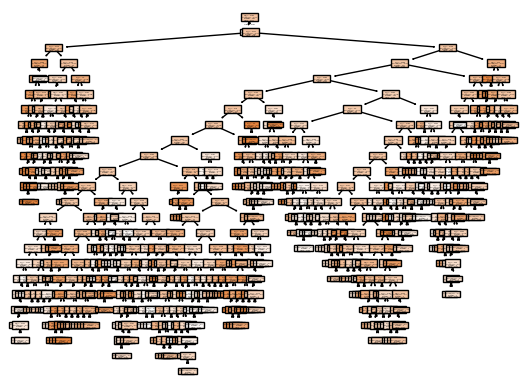

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()


In [58]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model

print(best_model)

LinearRegression()


In [59]:
import pickle
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
